In [1]:
# brain tumor classification 
# image X-RAY as input -> desicion about tymor from CNN

# Features:
# 1. Enable a GPU with "cuda"
# 2. Saving education progress
# 3. Saving weighs and baises
# 4. Want to see how looks beetween layers results

# 0. Setup enviroment
# 0.1. Set up libraries
# 0.2. Set up folders with images
# 0.3. Set up global names


# 1. About data
#    1.1 Importing data
#    1.2 Data destribution with grafic or pie chart # tran vs test # tumor vs no tumor 
# 2. Data normalisation and reshape
#    2.1. images into proper size reshape (might be with cv2 and contours) 
#    2.2. data separation to train and test

# 3. chosing data model and setup
#     3.1 Batch_size to choose
#     3.2 Adam parameters
#     3.3 Dropout 
#     4.1 between education accuracy result
#   conv 32, 4,4 
#   conv 64, 4,4
#   conv 128,4,4
#   conv 128,4,4
#   512 input Neurons
#   4 hidden layer
#   1 output with 0/1 - has tumor or not - softmax activation

# Train CNN
# show training results, model performance

# Avaluate model 
# confusion matrix

# model results accuracy


#-------------------------------------------------------------------
#V2.0
# get better accuracy and smaller lost
# 1.0 data augmentation
# 2.0 try not to cut images by object in the middle 
# result 78% accuracy
# V3.0
# change size of image to 128x128
# add more images as examlpes



In [3]:
import os, sys
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

import cv2

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [4]:

dir_path = os.getcwd()
file_path = fr"{dir_path}\\train.csv"
positive_tumor_path = fr"{dir_path}\\brain_tumor_dataset\\yes\\*.*"
negative_tumor_path = fr"{dir_path}\\brain_tumor_dataset\\no\\*.*"
docs_images_path = fr"{dir_path}\\docs"


In [10]:
# 2. Data normalisation and reshape

# Read an image using OpenCV
# Apply a Gaussian blur
# Find the biggest contour
# Get its extreme points (top, bottom, left, right)
# Crop the image by those extremes
# Here’s a complete, step-by-step Python code


# imortant!!! chech if all sizes are aprocimtly same 

# lets say that we need 1000 images for good education process
# each of the class should have 1000 examples 

train_tumor_images_path = []

train_tumor_images = []
goal_tumor_images = []

# Data Augmentation
def augment_image(img):
    # zufällige horizontale Spiegelung
    if random.random() > 0.5:
        img = cv2.flip(img, 1)
    # zufällige Drehung
    angle = random.randint(-15, 15)
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    # zufällige Helligkeit
    factor = 0.8 + 0.4 * random.random()
    #img = np.clip(img * factor, 0, 255).astype(np.uint8)
    img = np.clip(img.astype(np.float32) * factor, 0, 255).astype(np.uint8)
    return img


NUMBER_OF_EXAMPLES = 1000

number_of_cycles = (NUMBER_OF_EXAMPLES // len(glob.glob(positive_tumor_path))) + 1

for filename in glob.glob(positive_tumor_path):
    img_origin = cv2.imread(filename)
    img_resized = cv2.resize(img_origin, (128, 128))
    for i in range(number_of_cycles):
        img_augmented = augment_image(img_resized)
        train_tumor_images.append(img_augmented)
        goal_tumor_images.append([1])

print("train_tumor_images", len(train_tumor_images))
print("goal_tumor_images", len(goal_tumor_images))

number_of_cycles = (NUMBER_OF_EXAMPLES // len(glob.glob(negative_tumor_path))) + 1

for filename in glob.glob(negative_tumor_path):
    img_origin = cv2.imread(filename)
    img_resized = cv2.resize(img_origin, (128, 128))
    for i in range(number_of_cycles):
        img_augmented = augment_image(img_resized)
        train_tumor_images.append(img_augmented)
        goal_tumor_images.append([0])

print("train_tumor_images", len(train_tumor_images))
print("goal_tumor_images", len(goal_tumor_images))
            
    
# for test_image in train_tumor_images[0:5] + train_tumor_images[-5:]:
#     #test_image = X_test[i]
#     #test_image = np.squeeze(test_image, axis=-1)
#     plt.imshow(test_image)
#     plt.title(f"Test image ")
#     plt.show()

# number of cycles = len(positive_tumor_path)

train_tumor_images 1085
goal_tumor_images 1085
train_tumor_images 2163
goal_tumor_images 2163


In [11]:
# 2. Data normalisation and reshape

# Read an image using OpenCV
# Apply a Gaussian blur
# Find the biggest contour
# Get its extreme points (top, bottom, left, right)
# Crop the image by those extremes
# Here’s a complete, step-by-step Python code


# imortant!!! chech if all sizes are aprocimtly same 


In [12]:
train_tumor_images_pure = np.array([train_tumor_images]).T
goal_tumor_images_pure = np.array(goal_tumor_images)

print(train_tumor_images_pure.shape)
print(goal_tumor_images_pure.shape)

# 1️⃣ Перемістимо осі, щоб перший індекс був кількістю зразків
X = np.moveaxis(train_tumor_images_pure, [0, 1, 2, 3, 4], [3, 1, 2, 0, 4])
Y = goal_tumor_images_pure


# will keep test data as a path to picture to save memory space
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0


(3, 128, 128, 2163, 1)
(2163, 1)


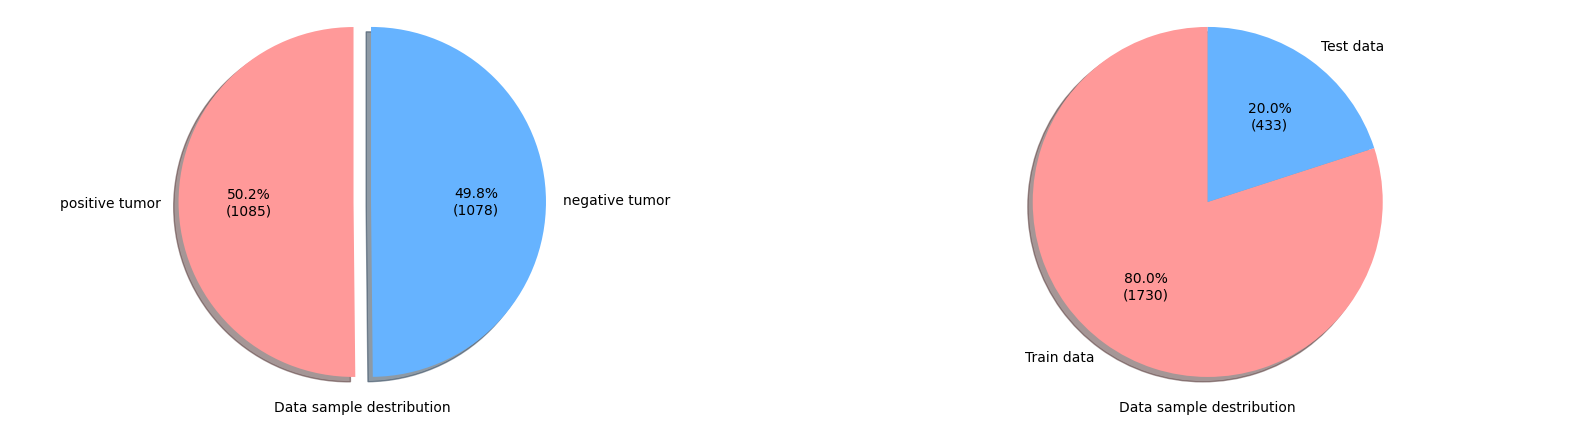

In [18]:
#1.2 Data destribution with grafic or pie chart # tran vs test # tumor vs no tumor 

def autopct_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

positive_tumor_amount = goal_tumor_images_pure[goal_tumor_images_pure == 1]
negative_tumor_amount = goal_tumor_images_pure[goal_tumor_images_pure == 0]

labels = ['positive tumor', 'negative tumor']
sizes = [len(positive_tumor_amount), len(negative_tumor_amount)]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

axes[0].pie(sizes, labels=labels, colors=colors, 
        autopct= lambda pct: autopct_format(pct, sizes),
        startangle=90, explode=explode, shadow=True)

axes[0].set_xlabel('Data sample destribution')
axes[0].axis('equal')

labels = ['Train data', 'Test data']
sizes = [len(X_train), len(X_test)]
colors = ['#ff9999','#66b3ff']
explode = (0, 0)

axes[1].pie(sizes, labels=labels, colors=colors, 
            autopct= lambda pct: autopct_format(pct, sizes),
        startangle=90, explode=explode, shadow=True)

axes[1].set_xlabel('Data sample destribution')
axes[1].axis('equal')

plt.show()

In [21]:
# 3. chosing data model and setup
# typical architecture: Conv → Conv → Pool → Conv → Pool → Conv → Pool → Flatten → Dense

# 3. chosing data model and setup
#     3.1 Batch_size to choose                  Done
#     3.2 Adam parameters                       Done
#     3.3 Dropout                               Done
#     4.1 between education accuracy result     Done

def build_cnn(input_shape=(128, 128, 3)):  # розмір зображення 128х128, 3 канали (RGB)
    model = models.Sequential([
        layers.Conv2D(32, (4, 4), activation='relu', padding='same', input_shape=input_shape),

        # 1 згортковий блок
        layers.Conv2D(64, (4, 4), activation='relu', padding='same'), # Padding = “доповнення” зображення нулями
        layers.MaxPooling2D((2, 2)),

        # 2 згортковий блок
        layers.Conv2D(128, (4, 4), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        
        layers.Flatten(),
        
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



model = build_cnn()
model.summary()




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 64)        │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       8,388,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,554,337 (32.63 MB)

 Trainable params: 8,554,337 (32.63 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
   
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(fr"{dir_path}\\best_model.keras", monitor='val_loss', save_best_only=True)
]


In [23]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=16,
                    callbacks=[callbacks])

Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 56s 618ms/step - accuracy: 0.7637 - loss: 0.5258 - val_accuracy: 0.8121 - val_loss: 0.3955
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 54s 617ms/step - accuracy: 0.8887 - loss: 0.2801 - val_accuracy: 0.8728 - val_loss: 0.2817
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 54s 627ms/step - accuracy: 0.9465 - loss: 0.1376 - val_accuracy: 0.9104 - val_loss: 0.2385
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 54s 619ms/step - accuracy: 0.9653 - loss: 0.0950 - val_accuracy: 0.9393 - val_loss: 0.1608
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 55s 628ms/step - accuracy: 0.9769 - loss: 0.0655 - val_accuracy: 0.9595 - val_loss: 0.1075
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 54s 621ms/step - accuracy: 0.9899 - loss: 0.0267 - val_accuracy: 0.9682 - val_loss: 0.0842
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 54s 620ms/step - accuracy: 0.9899 - loss: 0.0354 - val_accuracy: 0.9653 - val_loss: 0.0863
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 53s 610ms/step - accuracy: 0.9906 - loss: 0.0279 - 

In [24]:
# Можна передавати також validation_split=0.2 замість явних масивів (Keras розіб’є частину тренувальних даних на валідацію).
# Ідеальний сценарій:
# loss → плавно зменшується
# val_loss → зменшується або стабілізується
# accuracy → росте
# val_accuracy → росте або тримається близько до accuracy

# Поганий сценарій (overfitting):
# loss продовжує зменшуватись
# val_loss починає рости
# accuracy зростає, а val_accuracy падає → модель “запам’ятовує” тренувальні приклади

# Adaptive Moment Estimation
# Тобто Adam — це "розумний" оптимізатор,
# який автоматично підлаштовує learning rate під кожен параметр моделі.
# Без Dropout мережа може:
# "запам’ятати" тренувальні дані (overfitting)
# покладатись надто сильно на конкретні нейрони або зв’язки

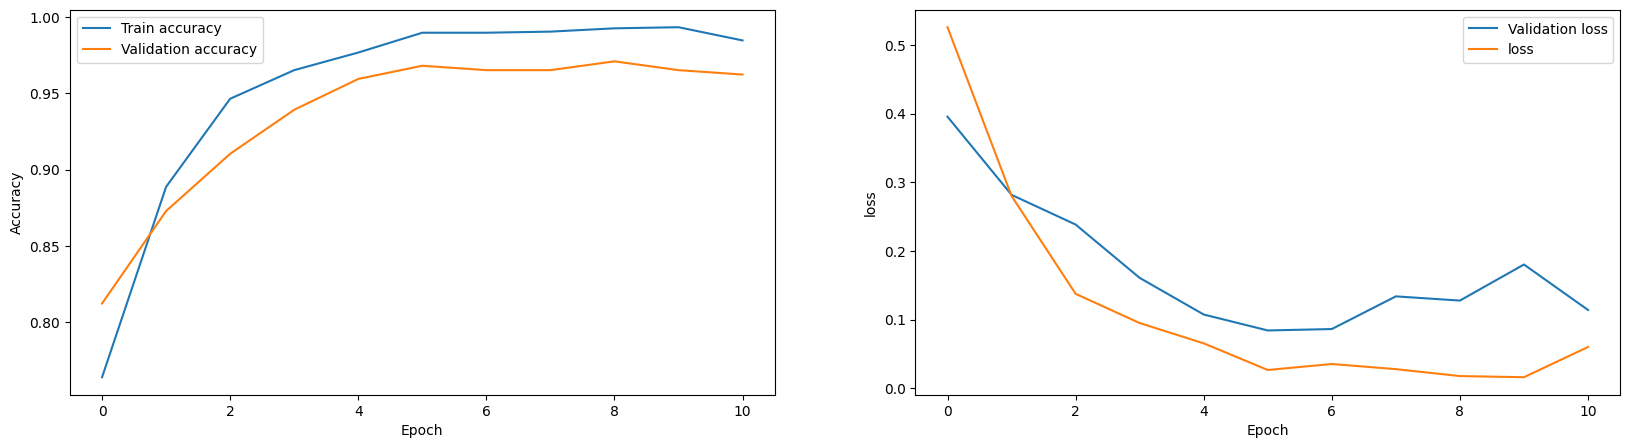

In [25]:

fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

axes[0].plot(history.history['accuracy'], label='Train accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation accuracy')

axes[0].legend()
#axes[0].title("Accuracy training")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")


axes[1].plot(history.history['val_loss'], label='Validation loss')
axes[1].plot(history.history['loss'], label='loss')
axes[1].legend()
#axes[1].title("loss training")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("loss")


plt.show()


In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"📊 Test accuracy: {test_accuracy:.4f}")
print(f"📉 Test loss: {test_loss:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.9885 - loss: 0.0395
📊 Test accuracy: 0.9885
📉 Test loss: 0.0395


In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# confusion matrix plot
cm = confusion_matrix(y_test, y_pred_labels, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tumor", "NO Tumor", ])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.savefig(fr"{dir_path}\docs\confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("Classification report:\n", classification_report(y_test, y_pred_labels))


In [ ]:
incorrect = np.where(y_pred_labels.flatten() != y_test.flatten())[0]

for i in incorrect[:5]:
    test_image = X_test[i]
    test_image = np.squeeze(test_image, axis=-1)
    plt.imshow(test_image)
    plt.title(f"True: {y_test[i]}, Predicted: {y_pred_labels[i][0]}")
    plt.show()